<h1 id="hid1" class="section">Prepared by Shabnam Seradji</h1>

Reference:

Compressive Sensing Theory</br>
link and Reference code:
https://www.youtube.com/watch?v=rt5mMEmZHfs</br>


In [48]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as spopt
import scipy.fftpack as spfft
import scipy.ndimage as spimg
import cvxpy as cvx

We have only limitted coefficients!

$f=\psi C$ (the vetor $C$ is mostly zero)

$b=\phi f$ ($\phi$ is our sampling matrix)

$b=\phi f=\phi \psi C=A C$



Create a signal

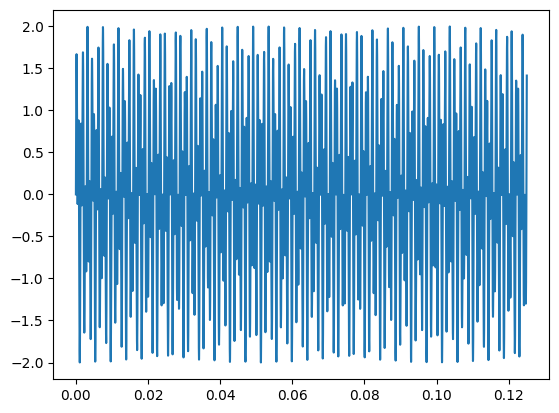

In [49]:
n = 5000
t = np.linspace(0, 1/8, n)
f = np.sin(1394 * np.pi * t) + np.sin(3266 * np.pi * t)
plt.plot(t,f)
plt.show()

Observe the spectrum of the signal in spectral domain

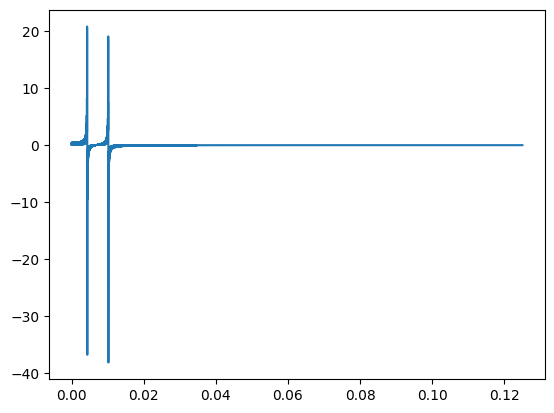

In [50]:
# signal’s frequency content is highly sparse, low rank structure.
# vetor C is sparse, few non-zero components
# spectrum is mostly zero except for the two spikes in frequency domain.

ft = spfft.dct(f, norm='ortho')
plt.plot(t,ft)

Sampling from the signal

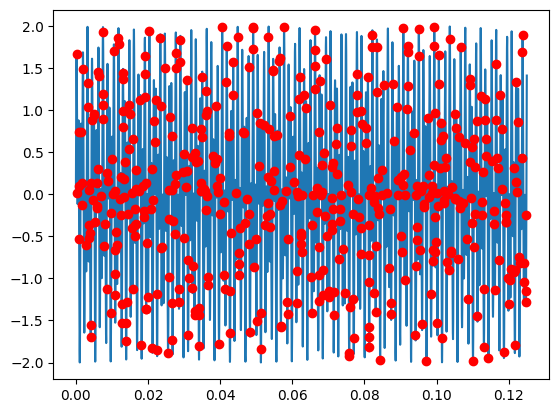

In [51]:
m = 500 # number of samples, instead of 5000 loations we sample 500 random measurement loations
ind = np.random.choice(n, m, replace=False) # shuffling
ind.sort()
tr = t[ind]
fr = np.sin(1394 * np.pi * tr) + np.sin(3266 * np.pi * tr) #same as b

plt.plot(t,f)
plt.plot(tr,fr,'ro')

Create the A matrix

In [52]:
D = spfft.idct(np.identity(n), norm='ortho', axis=0)
A = D[ind]

Optimization problem:

$min |X|_1$

$s.t. A\cdot X = b$ 
(candidate signals should match up exactly with our incomplete samples)

In [53]:
# L1 optimization
vx = cvx.Variable(n)
objective = cvx.Minimize(cvx.norm(vx, 1))
constraints = [A*vx == fr]
prob = cvx.Problem(objective, constraints)
result = prob.solve(verbose=True)

                                     CVXPY                                     
                                     v1.3.0                                    
(CVXPY) Jul 30 06:31:19 PM: Your problem has 5000 variables, 1 constraints, and 0 parameters.
(CVXPY) Jul 30 06:31:19 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jul 30 06:31:19 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 30 06:31:19 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jul 30 06:31:19 PM: Compiling problem (target solver=ECOS).
(CVXPY) Jul 30 06:31:19 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing 

c:\Users\shabnam\AppData\Local\Programs\Python\Python39\lib\site-packages\cvxpy\expressions\expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 7 times so far.

  warnings.warn(msg, UserWarning)


(CVXPY) Jul 30 06:31:22 PM: Applying reduction ECOS
(CVXPY) Jul 30 06:31:24 PM: Finished problem compilation (took 5.355e+00 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Jul 30 06:31:24 PM: Invoking solver ECOS  to obtain a solution.
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Jul 30 06:32:33 PM: Problem status: optimal
(CVXPY) Jul 30 06:32:33 PM: Optimal value: 3.486e+02
(CVXPY) Jul 30 06:32:33 PM: Compilation took 5.355e+00 seconds
(CVXPY) Jul 30 06:32:33 PM: Solver (including time spent in interface) took 6.891e+01 seconds


Reconstruct the signal

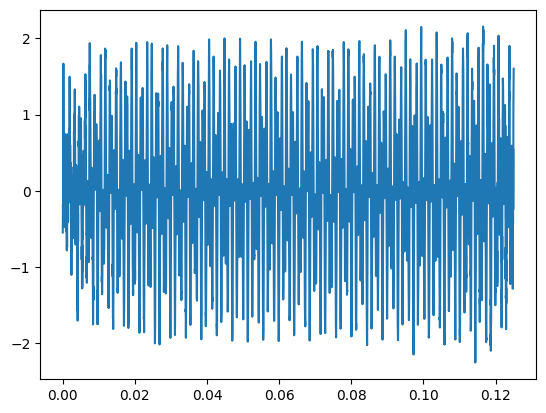

In [54]:
x = np.array(vx.value)
x = np.squeeze(x)
sig1 = spfft.idct(x, norm='ortho', axis=0)
plt.plot(t,sig1)